In [1]:
import sys
from scipy.sparse import dok_matrix, dia_matrix
from scipy.sparse.linalg import lobpcg
import numpy as np
import time
import matplotlib.pylab as plt
%matplotlib inline 
import scipy as sp
from sklearn.cluster import SpectralClustering
import math 
import warnings
warnings.filterwarnings("ignore")
sys.setrecursionlimit(1000)


In [2]:
def get_from_range(low, up, p):
    result = []
    if p == 0:
        return result
    cur = low
    while True:
        #print cur
        offset = np.random.geometric(p) - 1
        if   offset >=0:
            cur +=  offset
        else:
            return result 
        if cur >= up:
            return result
        result.append(cur)
        cur += 1




def planted_partition(n1,n2,p,q,filename):
    #out = open(filename, 'w')
    start_time = time.time()
    n = n1 + n2     
    A = sp.sparse.csr_matrix((n,n), dtype=np.int)
    for i in range(n1): 
        neigh_in  = get_from_range(i+1, n1, p)
        neigh_out = get_from_range(n1+1, n1+n2, q)
        neighbors = neigh_in+neigh_out
        for u in neighbors:
            #out.write(repr(i)+","+repr(u)+",1\n")
            A[i,u] = 1
            A[u,i] = 1  
    for i in range(n1+1, n+1):
        neighbors = get_from_range(i+1, n, p)
        for u in neighbors:
            #out.write(repr(i)+","+repr(u)+",1\n")
            A[i,u] = 1
            A[u,i] = 1  
    #out.close()
    print "Generating ("+ repr(n1)+ ","+ repr(n2)+","+repr(p)+","+repr(q)+") planted partition",
    print "took "+ repr(time.time() - start_time)
    return A

def spectral_prediction(A,n1,n2): 
    start_time = time.time()
    clustering = SpectralClustering(2, affinity='precomputed', eigen_solver='arpack')
    x=clustering.fit(A)
    clusters = clustering.fit_predict(A)
        
    print 'Spectral Clustering completed in '+ repr(time.time() - start_time)+" secs"

    win = 0 
    for i in range(n1):
        for j in range(i+1,n1): 
            if( clusters[i] == clusters[j] ):
                win+=1 
    
    for i in range(n1):
        for j in range(n1+1,n1+n2): 
            if( clusters[i] != clusters[j] ):
                win+=1 
    
    for i in range(n1+1,n2+n1):
        for j in range(i+1,n1+n2): 
            if( clusters[i] == clusters[j] ):
                win+=1
                
    accuracy = 2*float(win)/((n1+n2)*(n1+n2-1))
    print "Resulting accuracy: "+ repr(accuracy)
    return accuracy



In [3]:
def fixed_cluster_sizes(n1,n2,biases):
    accuracy_planted =[]
    accuracy_paths =[]
    counter = 1 
    for delta in biases:
        p=0.5+delta/2
        q=0.5-delta/2
        print "Experiment "+repr(counter)+": n1="+repr(n1)+", n2="+repr(n2)+", bias "+repr(100*delta)+"%" 

        #filename = "./data/pt_"+repr(n1)+"_"+repr(n2)+"_"+repr(100*p)+"_"+repr(100*q)+".txt"
        print "Planted partition"
        A = planted_partition(n1,n2,p,q,"")
        accuracy_planted.append( spectral_prediction(A,n1,n2)  )

      

        counter+=1
    return accuracy_planted

In [4]:
biases = np.linspace(0,1,num=41) #step 0.025
n1 = 100
n2 = 20
accuracy_planted = fixed_cluster_sizes(n1,n2,biases)

Experiment 1: n1=100, n2=20, bias 0.0%
Planted partition
Generating (100,20,0.5,0.5) planted partition took 2.7518599033355713
Spectral Clustering completed in 0.10156607627868652 secs
Resulting accuracy: 0.4917366946778711
Experiment 2: n1=100, n2=20, bias 2.5%
Planted partition
Generating (100,20,0.51249999999999996,0.48749999999999999) planted partition took 2.4993507862091064
Spectral Clustering completed in 0.0486750602722168 secs
Resulting accuracy: 0.500140056022409
Experiment 3: n1=100, n2=20, bias 5.0%
Planted partition
Generating (100,20,0.52500000000000002,0.47499999999999998) planted partition took 2.4323530197143555
Spectral Clustering completed in 0.038049936294555664 secs
Resulting accuracy: 0.4976190476190476
Experiment 4: n1=100, n2=20, bias 7.5000000000000009%
Planted partition
Generating (100,20,0.53749999999999998,0.46250000000000002) planted partition took 2.4444169998168945
Spectral Clustering completed in 0.04702401161193848 secs
Resulting accuracy: 0.49341736694

Generating (100,20,0.90000000000000002,0.099999999999999978) planted partition took 4.182985067367554
Spectral Clustering completed in 0.02606201171875 secs
Resulting accuracy: 0.9833333333333333
Experiment 34: n1=100, n2=20, bias 82.5%
Planted partition
Generating (100,20,0.91250000000000009,0.087499999999999967) planted partition took 4.211435079574585
Spectral Clustering completed in 0.029799938201904297 secs
Resulting accuracy: 0.9833333333333333
Experiment 35: n1=100, n2=20, bias 85.000000000000014%
Planted partition
Generating (100,20,0.92500000000000004,0.074999999999999956) planted partition took 6.118744134902954
Spectral Clustering completed in 0.09815406799316406 secs
Resulting accuracy: 0.9833333333333333
Experiment 36: n1=100, n2=20, bias 87.5%
Planted partition
Generating (100,20,0.9375,0.0625) planted partition took 4.721260070800781
Spectral Clustering completed in 0.0355839729309082 secs
Resulting accuracy: 0.9833333333333333
Experiment 37: n1=100, n2=20, bias 90.0%
Pl

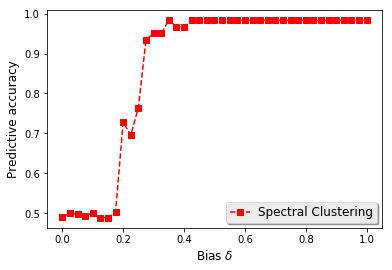

In [5]:
fig, ax = plt.subplots()
ax.plot(biases, accuracy_planted, 'rs--', label='Spectral Clustering')  
legend = ax.legend(loc='lower right', shadow=True)

frame = legend.get_frame()

for label in legend.get_texts():
    label.set_fontsize('large')

for label in legend.get_lines():
    label.set_linewidth(1.5)  # the legend line width
    
plt.xlabel('Bias $\delta$',fontsize=12)
plt.ylabel('Predictive accuracy',fontsize=12)
plt.show()
plt.savefig("range_bias_n1_100_n2_20.png")